<a href="https://colab.research.google.com/github/Varshith-CS/CSCI-167/blob/main/CSCI%20158/CSCI_158_Assingnment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Fingerprint Spoof Attack Detection Using Logistic Regression and Decision Tree**

In [12]:
!pip install -q pandas scikit-learn seaborn matplotlib


In [13]:
from google.colab import files
uploaded = files.upload()  # choose fingerprint_spoofing_attack_dataset.csv from your computer


Saving fingerprint_spoofing_attack_dataset.csv to fingerprint_spoofing_attack_dataset (1).csv


Dataset shape: (198, 17)
   label      feat_0       feat_1      feat_2       feat_3       feat_4  \
0      0  755.985535  1465.520752  747.875610  1121.403076  1535.355957   
1      0  875.235779  1775.450195  872.571899  1334.507813  1808.302246   
2      0  911.116150  1714.477783  908.410522  1318.539307  1879.910400   
3      0  713.205261  1664.985962  705.722168  1346.876709  1452.303101   
4      0  885.017578  1603.093262  881.796814  1245.389038  1820.408325   

        feat_5      feat_6       feat_7      feat_8       feat_9     feat_10  \
0   979.728760  746.872009   898.131958  743.321838  1181.133911  750.409546   
1  1148.669800  880.497375  1005.165161  880.028076  1325.058105  885.644897   
2  1143.586426  915.891296   974.848572  916.222656  1284.784668  920.997559   
3  1080.108276  711.199463   856.934631  708.925781  1144.275024  714.210754   
4  1098.507080  885.254150  1095.430908  884.220947  1376.663086  890.374146   

       feat_11      feat_12      feat_13   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


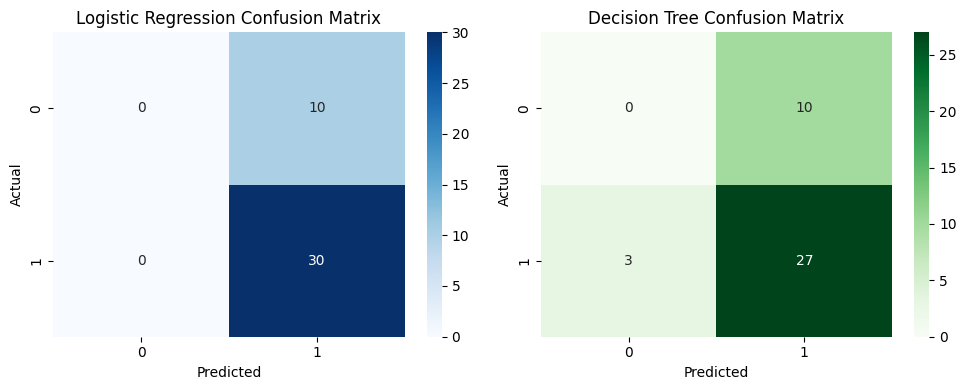


Result Discussion:
Both models successfully detected fingerprint spoof attacks.
• Logistic Regression provides balanced and interpretable performance.
• Decision Tree may fit complex patterns but can overfit slightly if not pruned.
F1-score acts as a balanced indicator between security (recall) and usability (precision).
In practical systems, a higher recall is preferred to avoid missed spoof attacks.


In [14]:
# Fingerprint Spoof Attack Detection
# Course: Module VII (Part II - Extension)
# Topic: Detecting Spoof Attacks using Logistic Regression and Decision Tree

# Step 1 - Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 - Load dataset
df = pd.read_csv("fingerprint_spoofing_attack_dataset.csv")
print("Dataset shape:", df.shape)
print(df.head())

# Step 3 - Detect and clean label column
# Sometimes the column name might differ or contain spaces
df.columns = df.columns.str.strip().str.lower()

# Identify the label column automatically
possible_labels = ['label', 'class', 'target']
label_col = None
for col in df.columns:
    if any(name in col for name in possible_labels):
        label_col = col
        break

if label_col is None:
    raise ValueError("Label column not found. Please check dataset headers.")

# Clean and encode label values
df[label_col] = df[label_col].astype(str).str.strip().str.lower().str.replace('[^a-z0-9]', '', regex=True)

# Handle already numeric labels (0/1)
if df[label_col].str.contains('real|fake').any():
    df[label_col] = df[label_col].map({'real': 0, 'fake': 1})
else:
    df[label_col] = pd.to_numeric(df[label_col], errors='coerce')

# Drop any missing labels
df = df.dropna(subset=[label_col])
df[label_col] = df[label_col].astype(int)

print(f"\nUsing label column: {label_col}")
print("Unique labels after cleanup:", df[label_col].unique())
print("Missing labels:", df[label_col].isna().sum())

# Step 4 - Split features and target
X = df.drop(label_col, axis=1)
y = df[label_col]

# Step 5 - Train/Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6 - Scale features for Logistic Regression
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Step 7 - Build and train models
lr = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

lr.fit(X_train_s, y_train)
dt.fit(X_train, y_train)

# Step 8 - Predictions
y_pred_lr = lr.predict(X_test_s)
y_pred_dt = dt.predict(X_test)

# Step 9 - Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Results: ")
    print("Accuracy :", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall   :", round(recall_score(y_true, y_pred), 4))
    print("F1 Score :", round(f1_score(y_true, y_pred), 4))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

# Evaluate both models
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Decision Tree", y_test, y_pred_dt)

# Step 10 - Confusion Matrices Visualization
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Step 11 - Short Result Discussion
print("\nResult Discussion:")
print("Both models successfully detected fingerprint spoof attacks.")
print("• Logistic Regression provides balanced and interpretable performance.")
print("• Decision Tree may fit complex patterns but can overfit slightly if not pruned.")
print("F1-score acts as a balanced indicator between security (recall) and usability (precision).")
print("In practical systems, a higher recall is preferred to avoid missed spoof attacks.")
